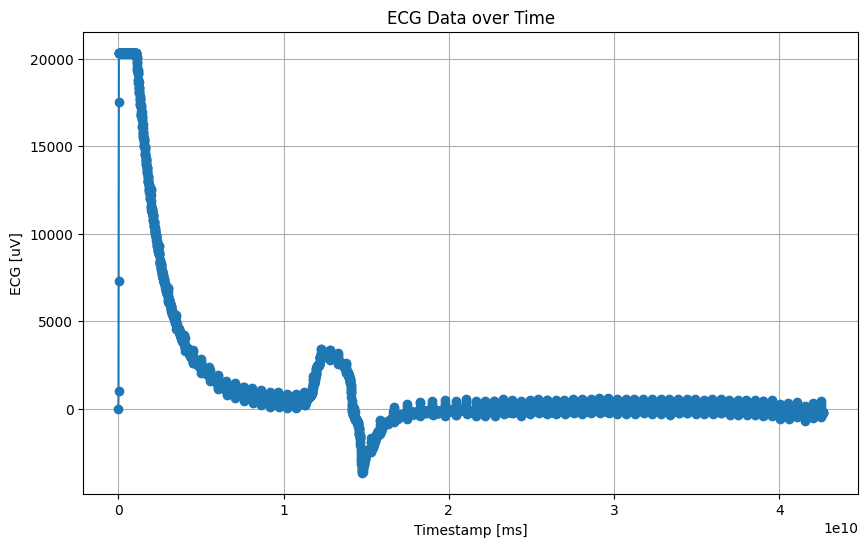

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from text file
data = pd.read_csv("./polar/Polar_H10_83A00120_20240419_144517_ECG.txt", delimiter=";")

# Convert timestamp columns to datetime objects
data['Phone timestamp'] = pd.to_datetime(data['Phone timestamp'])
data['sensor timestamp [ns]'] = pd.to_datetime(data['sensor timestamp [ns]'], unit='ns')
data['timestamp [ms]'] = pd.to_timedelta(data['timestamp [ms]'], unit='ms')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp [ms]'], data['ecg [uV]'], marker='o', linestyle='-')
plt.title('ECG Data over Time')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()


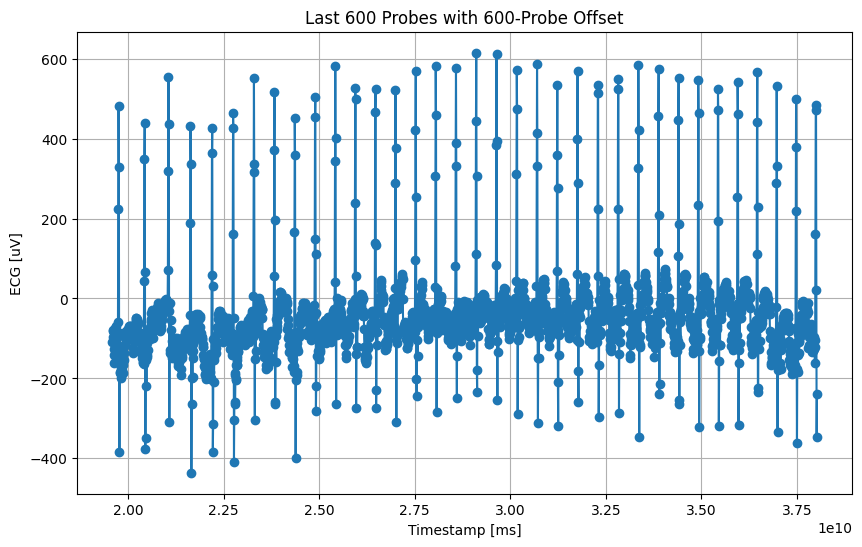

In [106]:
# Get the last 600 probes with a 600-probe offset
offset = 600
last_probe_index = data.index[-1]
start_index = max(last_probe_index - offset - 2399, 0)
last_600_probes_with_offset = data.iloc[start_index:last_probe_index - offset + 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(last_600_probes_with_offset['timestamp [ms]'], last_600_probes_with_offset['ecg [uV]'], marker='o', linestyle='-')
plt.title('Last 600 Probes with 600-Probe Offset')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()

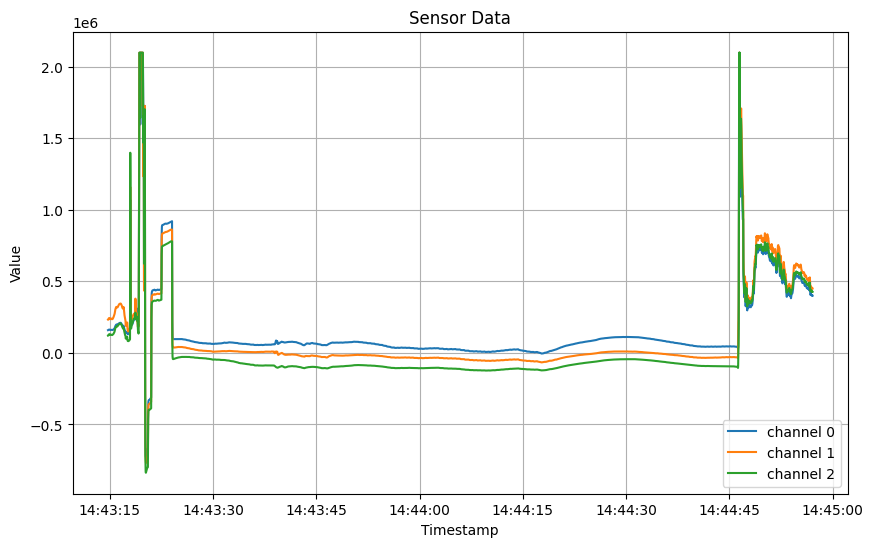

In [107]:
from datetime import datetime

# Read data from the text file
file_path = "./polar/Polar_Sense_9F124324_20240419_144313_PPG.txt"  # Replace with the path to your text file
timestamps = []
channel_data = {'channel 0': [], 'channel 1': [], 'channel 2': []}

with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        parts = line.strip().split(';')
        timestamps.append(datetime.fromisoformat(parts[0]))
        for i, channel in enumerate(['channel 0', 'channel 1', 'channel 2']):
            channel_data[channel].append(int(parts[i + 2]))

# Plot the data
plt.figure(figsize=(10, 6))

for channel, data in channel_data.items():
    plt.plot(timestamps, data, label=channel)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor Data')
plt.legend()
plt.grid(True)
plt.show()

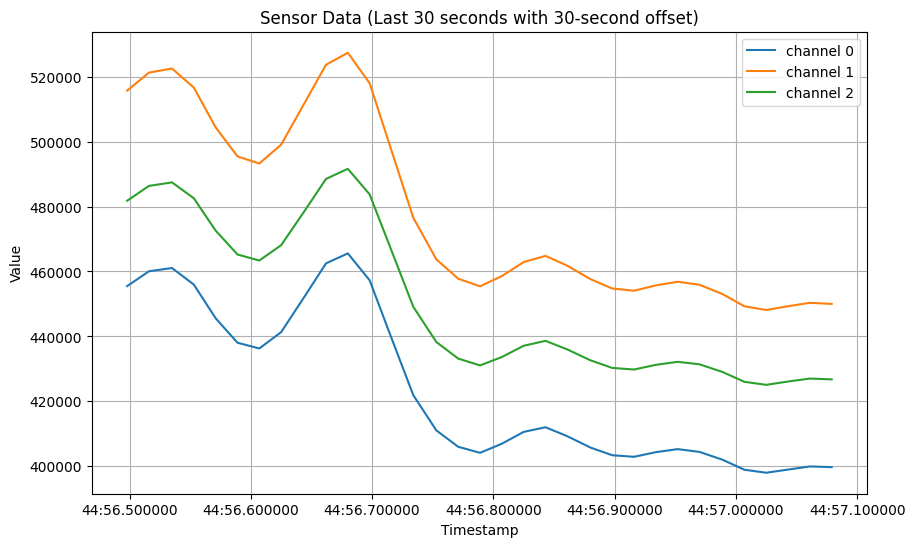

In [110]:
from datetime import timedelta
# Calculate the start and end timestamps for the last 30 seconds
end_time = timestamps[-1]
start_time = end_time - timedelta(seconds=0.008*5)

# Find the index of the first timestamp within the last 30 seconds
start_index = None
for i, ts in enumerate(timestamps):
    if ts >= start_time:
        start_index = i
        break

# Adjust the start index by adding a 30-second offset
if start_index is not None:
    start_index = max(0, start_index - 30)

# Plot the data for the last 30 seconds with 30-second offset
plt.figure(figsize=(10, 6))

for channel, data in channel_data.items():
    plt.plot(timestamps[start_index:], data[start_index:], label=channel)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor Data (Last 30 seconds with 30-second offset)')
plt.legend()
plt.grid(True)
plt.show()

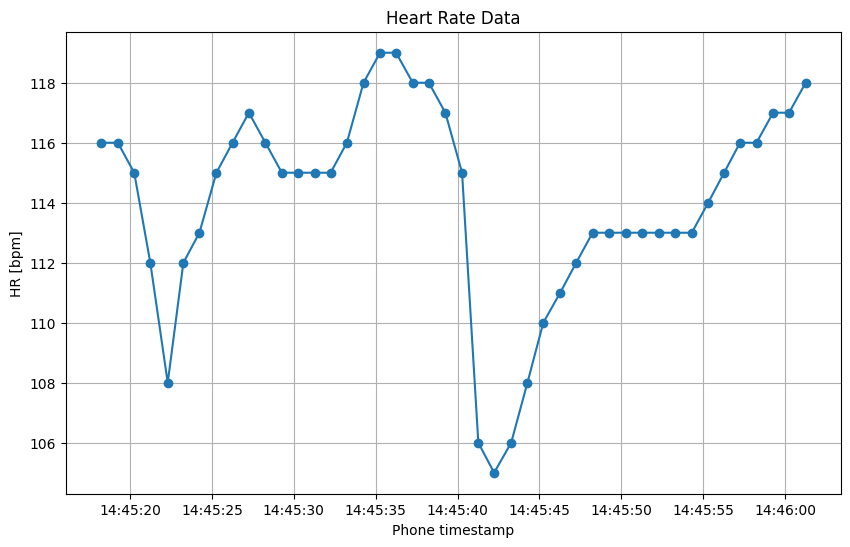

Phone timestamp;HR [bpm];HRV [ms];
2024-04-19T14:45:18.232000;116;
2024-04-19T14:45:19.253000;116;
2024-04-19T14:45:20.253000;115;
2024-04-19T14:45:21.235000;112;
2024-04-19T14:45:22.299000;108;
2024-04-19T14:45:23.254000;112;
2024-04-19T14:45:24.235000;113;
2024-04-19T14:45:25.271000;115;
2024-04-19T14:45:26.258000;116;
2024-04-19T14:45:27.253000;117;
2024-04-19T14:45:28.263000;116;
2024-04-19T14:45:29.269000;115;
2024-04-19T14:45:30.253000;115;
2024-04-19T14:45:31.272000;115;
2024-04-19T14:45:32.247000;115;
2024-04-19T14:45:33.237000;116;
2024-04-19T14:45:34.256000;118;
2024-04-19T14:45:35.262000;119;
2024-04-19T14:45:36.241000;119;
2024-04-19T14:45:37.261000;118;
2024-04-19T14:45:38.243000;118;
2024-04-19T14:45:39.252000;117;
2024-04-19T14:45:40.272000;115;
2024-04-19T14:45:41.265000;106;
2024-04-19T14:45:42.230000;105;
2024-04-19T14:45:43.272000;106;
2024-04-19T14:45:44.263000;108;
2024-04-19T14:45:45.231000;110;
2024-04-19T14:45:46.264000;111;
2024-04-19T14:45:47.243000;112;
2024-

In [118]:
# Read data from the text file
file_path = "./polar/Polar_H10_83A00120_20240419_144516_HR.txt"  # Replace with the path to your text file
phone_timestamps = []
hr_values = []

with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        parts = line.strip().split(';')
        phone_timestamps.append(datetime.fromisoformat(parts[0]))
        hr_values.append(int(parts[1]))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(phone_timestamps, hr_values, marker='o', linestyle='-')
plt.xlabel('Phone timestamp')
plt.ylabel('HR [bpm]')
plt.title('Heart Rate Data')
plt.grid(True)
plt.show()

# Print the data in the specified format
print("Phone timestamp;HR [bpm];HRV [ms];")
for timestamp, hr in zip(phone_timestamps, hr_values):
    print(f"{timestamp.isoformat()};{hr};")
